<a href="https://colab.research.google.com/github/betr0dalf/TIMO/blob/main/TIMO_NovikovDV_prac6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Технологии и инструментарий машинного обучения
# Практическая работа № 6
# Выполнил студент группы ИНБО-05-22
# Новиков Денис Владиславович

## Импорт необходимых библиотек

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage

## Загрузка и предобработка данных

In [ ]:
# Загрузка данных
data = pd.read_csv('jewellery.csv')
X = data
print("Размерность датасета:", X.shape)

X.head()

Размерность датасета: (505, 4)


,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [ ]:
# Удаление повторяющихся строк
X = X.drop_duplicates()

# Удаление строк с пустым значением
X.fillna(X.mean(), inplace=True)
X = X.dropna()

# Нормализация
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

X_scaled.head()

,Age,Income,SpendingScore,Savings
0,-0.042287,0.062733,1.103593,-1.072467
1,-0.000821,0.174811,1.102641,-1.303473
2,0.123577,-0.021200,0.761727,-0.526556
3,-0.000821,-0.031712,1.004705,-0.913395
4,1.160228,-1.606165,-0.602619,1.012686


## Кластеризация методом K-средних

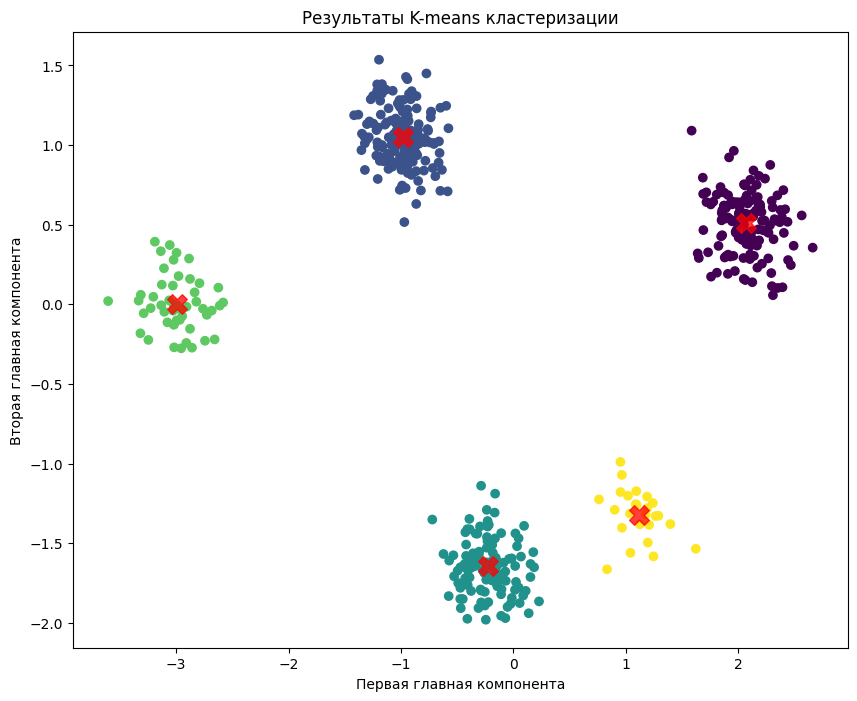

In [ ]:
# Снижение размерности до 2D с использованием PCA
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Кластеризация методом K-средних
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_pca_2d)
kmeans_labels = kmeans.labels_

# Центроиды в 2D
centroids_2d = kmeans.cluster_centers_

# Визуализация кластеризации методом K-средних в 2D
plt.figure(figsize=(10, 8))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('Результаты K-means кластеризации')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.show()

## Иерархическая кластеризация

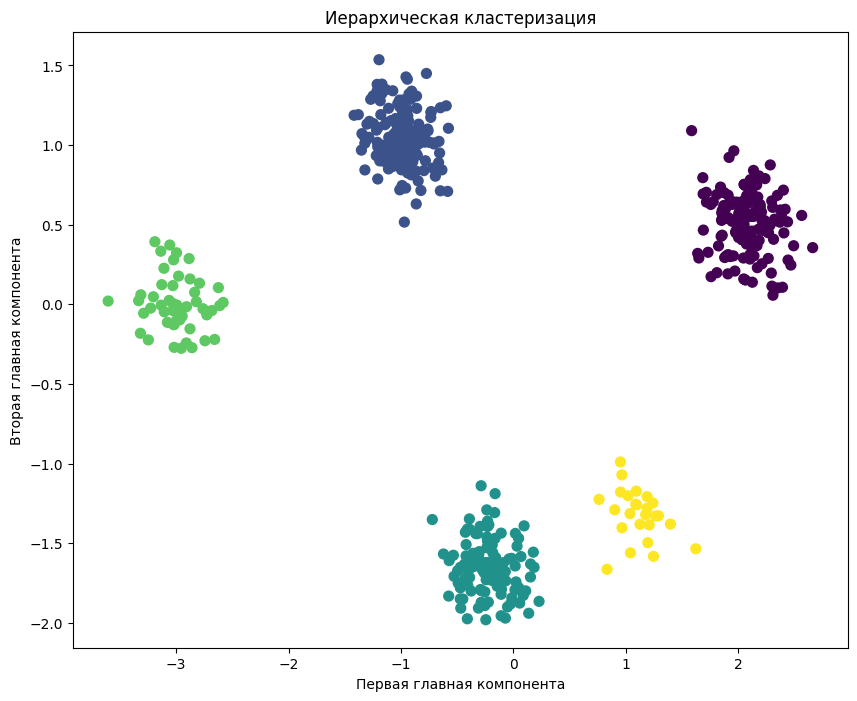

In [ ]:
# Иерархическая кластеризация
hierarchical = AgglomerativeClustering(n_clusters=5, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# Визуализация иерархической кластеризации в 2D
plt.figure(figsize=(10, 8))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=hierarchical_labels, cmap='viridis', s=50)
plt.title('Иерархическая кластеризация')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.show()

## Кластеризация методом DBSCAN

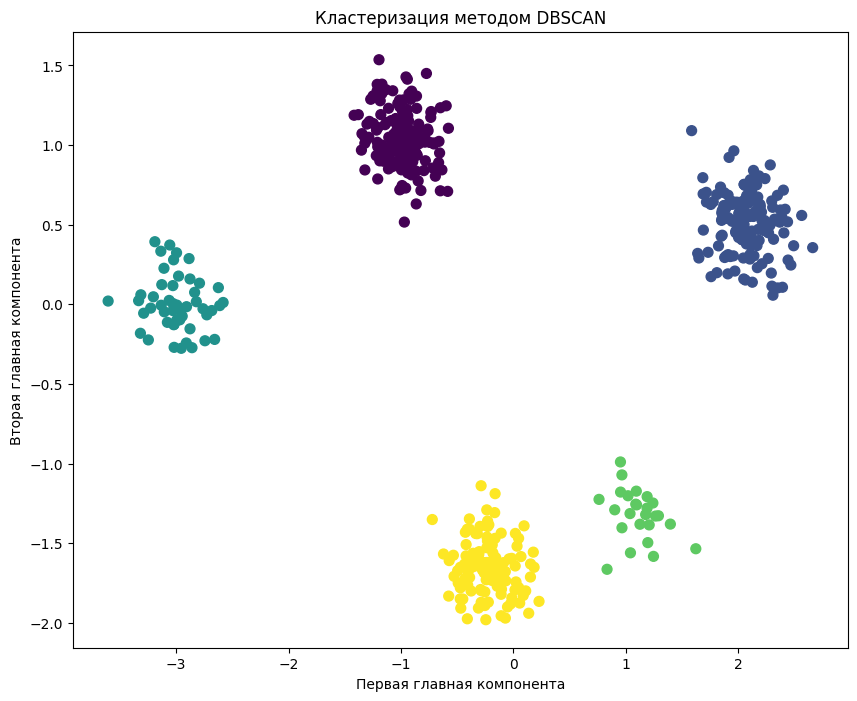

In [ ]:
# Кластеризация методом DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=3)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Визуализация кластеризации методом DBSCAN в 2D
plt.figure(figsize=(10, 8))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=dbscan_labels, cmap='viridis', s=50)
plt.title('Кластеризация методом DBSCAN')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.show()

## Определяем количество кластеров

### Метод "локтя"

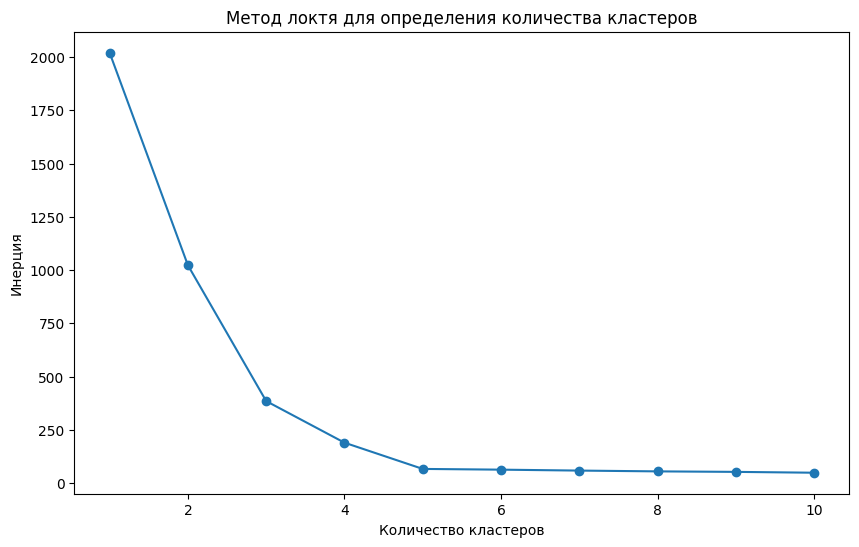

In [ ]:
# Построение "локтя" для K-средних
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.title('Метод локтя для определения количества кластеров')
plt.show()

### Коэффициент силуэта

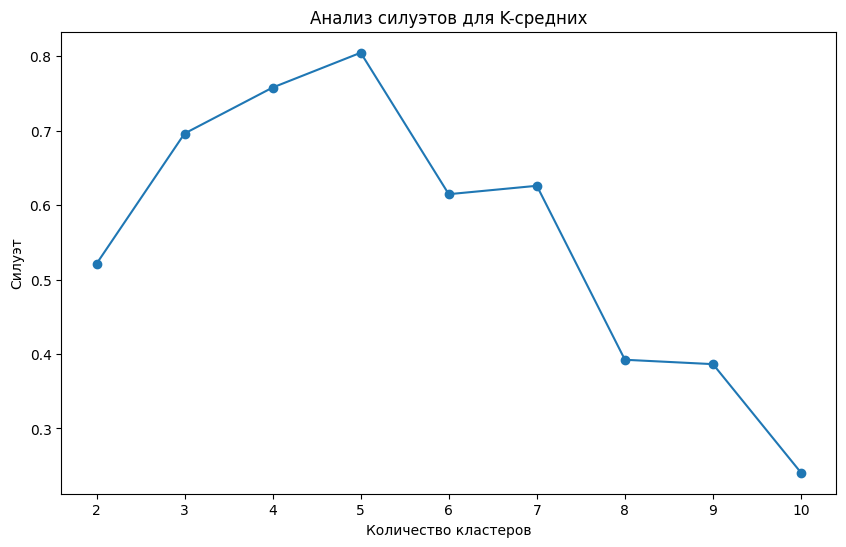

In [ ]:
# Анализ силуэтов для K-средних
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Силуэт')
plt.title('Анализ силуэтов для K-средних')
plt.show()

## Дендрограмма иерархической кластеризации

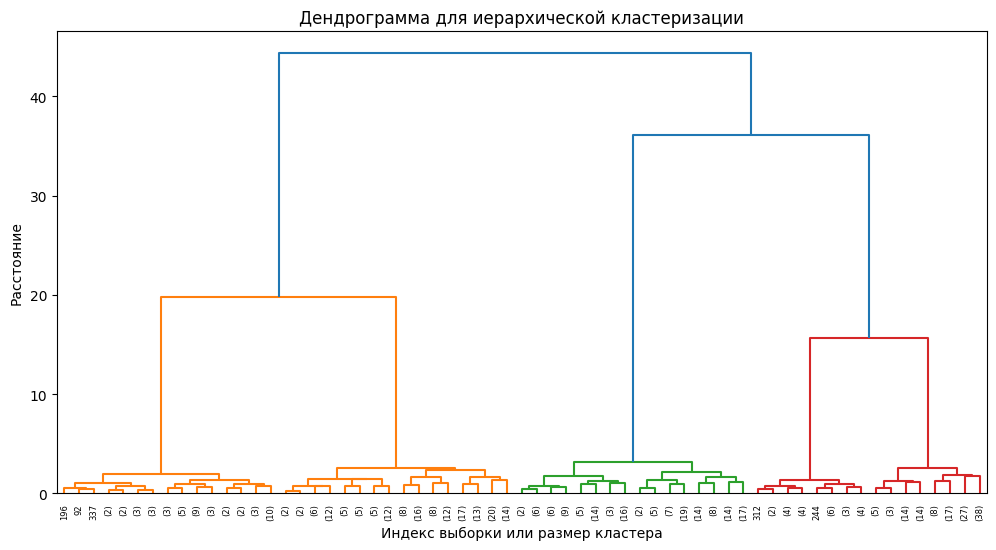

In [ ]:
# Построение дендрограммы для иерархической кластеризации
linkage_matrix = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Дендрограмма для иерархической кластеризации')
plt.xlabel('Индекс выборки или размер кластера')
plt.ylabel('Расстояние')
plt.show()

## Сравнение коэффициентов силуэтов

In [ ]:
# Сравнение коэффициентов силуэтов для всех методов кластеризации
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
hierarchical_silhouette = silhouette_score(X_scaled, hierarchical_labels)
dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)

print("Сравнение коэффициентов силуэтов:")
print(f"Кластеризация методом K-средних: {kmeans_silhouette:.3f}")
print(f"Иерархическая кластеризация: {hierarchical_silhouette:.3f}")
print(f"Кластеризация методом DBSCAN: {dbscan_silhouette:.3f}")

Сравнение коэффициентов силуэтов:
Кластеризация методом K-средних: 0.805
Иерархическая кластеризация: 0.805
Кластеризация методом DBSCAN: 0.805


## Вывод:

 Для оценки эффективности кластеризации применялся силуэтный коэффициент, который оценивает степень сходства объектов внутри кластера и их различие с объектами других кластеров. По графикам видно наглядно, что каждый из методов кластеризации определил одинаковое количество кластеров с соответствующими элементами внутри, из-за чего мы и можем наблюдать одинаковые значения коэффициентов силуэтов. Можно сделать вывод, что каждый из методов кластеризации для использованного набора данных работает одинаково успешно. Коэффициенты силуэты достаточно высоки, что говорит о хорошо проделанной кластеризации.